### PRACTICE ASSIGNMENTS

In [1]:
import pandas as pd
import numpy as np

Loading the dataset...

In [2]:
data = pd.read_csv('dataset_week2_pa.csv', sep = ',')
data = data.replace('?', np.nan)
y = data.pop('Target')
X = data
X_np, y_np = data.to_numpy(), y.to_numpy() #for numpy
X.shape, y.shape
data

,V1,V2,V3,V4,V5
0,2.0,50.0,12500.0,98.0,NEGATIVE
1,0.0,13.0,3250.0,28.0,NEGATIVE
2,NaN,NaN,4000.0,35.0,NEGATIVE
3,NaN,20.0,5000.0,45.0,NEGATIVE
4,1.0,24.0,6000.0,77.0,NEGATIVE
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE
744,21.0,2.0,500.0,52.0,NEGATIVE
745,23.0,3.0,750.0,62.0,NEGATIVE
746,39.0,1.0,250.0,39.0,NEGATIVE


Q1. How many samples are there in this dataset?

In [3]:
print(X.shape[0]) #using pandas
print(X_np.shape[0]) #using numpy

748
748


Q2. How many input features are there in this dataset?

In [4]:
print(X.shape[1]) #using pandas
print(X_np.shape[1]) #using numpy

5
5


Q3. What type of problem is this?

Ans : Classification

Q4. Which of the features has least variance?

In [5]:
X4 = X.copy()
X4['V1'] = pd.to_numeric(X4['V1'])
X4['V2'] = pd.to_numeric(X4['V2'])
X4.var()

C:\Users\HP\AppData\Local\Temp\ipykernel_2868\3146089849.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X4.var()


V1    6.550517e+01
V2    3.363720e+01
V3    2.131094e+06
V4    5.942242e+02
dtype: float64

Q5. Which of the following features has least number of outliers?

<AxesSubplot:>

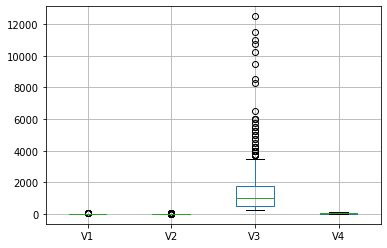

In [6]:
# IQ = X4.quantile(.75) - X4.quantile(.25)
# left_Range = X4.quantile(.25) - 1.5 * IQ
# right_Range = X4.quantile(.75) + 1.5 * IQ

X4.boxplot()

Q6. Which of the following is true about target variable?

In [7]:
# Using pandas
print(pd.value_counts(y == 'YES'))

# Using numpy
# METHOD 1

# mapp = np.where(y_np == 'YES', 1, 0)
# print('YES :', mapp.sum(), ',', 'No :', y_np.shape[0] - mapp.sum())

#METHOD 2

print('\nYES :', np.count_nonzero(y_np == 'YES'), ',', 'No :', np.count_nonzero(y_np == 'NO'))

False    570
True     178
Name: Target, dtype: int64

YES : 178 , No : 570


Q7. How many features have missing values in the dataset?

In [8]:
data.isnull().sum()

V1    5
V2    5
V3    0
V4    0
V5    0
dtype: int64

Q8. What is total number of missing values in the dataset?

In [9]:
x = X.replace('?', np.nan)
np.count_nonzero(x.isnull())

10

Q9. What is average of first feature (i.e. 'V1') after applyting SimpleImputer(strategy = 'median')?

In [10]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'median')
local_data9 = data.copy()
X_np_si = si.fit_transform(local_data9.pop('V1').to_numpy().reshape(-1,1))
np.mean(X_np_si)

9.552139037433156

Q10. What is average of first column after applyting KNNImputer(n_neighbors = 3)?

In [11]:
from sklearn.impute import KNNImputer

ki = KNNImputer(n_neighbors = 3)
local_data10 = data.copy()
X_np_ki = ki.fit_transform(local_data10.pop('V1').to_numpy().reshape(-1,1))
np.mean(X_np_ki)

9.562584118438762

Q11. What is average of second feature (i.e. 'V2') after applyting SimpleImputer(strategy = 'mean')?

In [12]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'mean')
local_data11 = data.copy()
X_np_si_mean = si.fit_transform(local_data11.pop('V2').to_numpy().reshape(-1,1))
np.mean(X_np_si_mean)

5.464333781965007

### GRADED ASSIGNMENTS

Q1. How many features remain after applying following pipeline to the feature matrix?

In [13]:
data_graded = pd.read_csv('dataset_week2_pa.csv', sep = ',')
data_graded = data_graded.replace('?', np.nan)
features, labels = data_graded.loc[:,["V1", "V2", "V3", "V4", "V5"]], data_graded["Target"]
features, labels

(       V1    V2       V3    V4        V5
 0     2.0  50.0  12500.0  98.0  NEGATIVE
 1     0.0  13.0   3250.0  28.0  NEGATIVE
 2     NaN   NaN   4000.0  35.0  NEGATIVE
 3     NaN  20.0   5000.0  45.0  NEGATIVE
 4     1.0  24.0   6000.0  77.0  NEGATIVE
 ..    ...   ...      ...   ...       ...
 743  23.0   2.0    500.0  38.0  NEGATIVE
 744  21.0   2.0    500.0  52.0  NEGATIVE
 745  23.0   3.0    750.0  62.0  NEGATIVE
 746  39.0   1.0    250.0  39.0  NEGATIVE
 747  72.0   1.0    250.0  72.0  NEGATIVE
 
 [748 rows x 5 columns],
 0      YES
 1      YES
 2      YES
 3      YES
 4       NO
       ... 
 743     NO
 744     NO
 745     NO
 746     NO
 747     NO
 Name: Target, Length: 748, dtype: object)

In [14]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer


pipeline = Pipeline([('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0,4))])),
                    ('impute', SimpleImputer(strategy = 'mean')),
                    ('std_scaler', StandardScaler())
                    ])

enc = ColumnTransformer([('Ordinal_encoder', OrdinalEncoder(), [4])])

fu = FeatureUnion(transformer_list=[('pipeline', pipeline),
                                    ('enc', enc)])

data = fu.fit_transform(features)
VarianceThreshold(threshold=0.1).fit_transform(data).shape[1]


4

Q2. What are the two most important features computed by RFE?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(LogisticRegression(), n_features_to_select=2, step=1)
rfe.fit_transform(data, labels)

rfe.support_

array([ True, False,  True, False, False])

Q3. What are the indices of two most important features computed by SFS (forward)?

Preprocess the data using pipeline shown in the diagram.Use LogisticRegression (with  default parameters) for the estimator. Encode target variable via ordinal encoding.

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LogisticRegression())
sfs.fit_transform(data, labels)

sfs.support_

array([False,  True, False,  True, False])

Q4. What are the indices of two most important features computed by SFS (backward)?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_b = SequentialFeatureSelector(LogisticRegression(), direction='backward')
sfs_b.fit_transform(data, labels)

sfs_b.support_

array([False, False,  True,  True, False])